

Kindey volumes:

Shapiro-Wilk test for Healthy Data: p-value = 0.1382
Data can be considered normally distributed (p = 0.13822206854820251 > 0.05).
Shapiro-Wilk test for Pathological Data: p-value = 0.1125
Data can be considered normally distributed (p = 0.11246126890182495 > 0.05).

t-test p-value: 8.4e-04
The difference between the means is statistically significant.
Mean healthy kidney volume:  101.35973624714859
Std healthy kidney volume:  20.68466523632446
Mean pathological kidney volume:  165.5175970614796
Std healthy kidney volume:  20.68466523632446



Healthy principal axes lengths:  [[ 825.18701339  808.53275094  943.70852493  888.56719021  996.50801037
  1001.73660284  876.85027694  854.83361506]
 [ 740.96815555  747.59139148  890.03879449  818.02692719  944.1226792
   960.81627031  791.68227268  786.32959411]
 [ 549.1405427   527.60763466  580.48763861  604.81852918  548.17539873
   594.41705932  524.06291328  532.59913356]]
Pathological principal axes lengths:  [[ 997.35

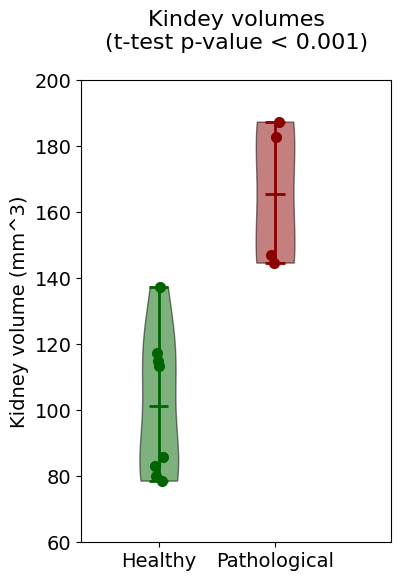

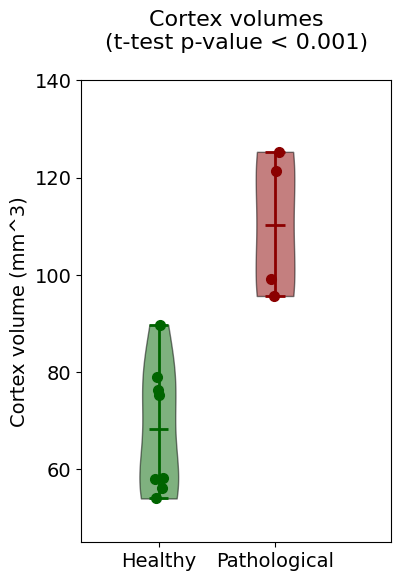

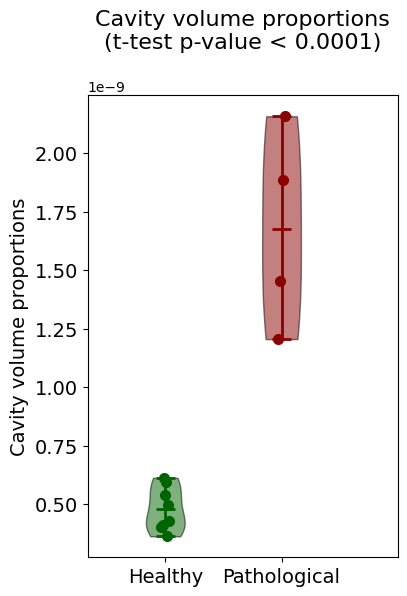

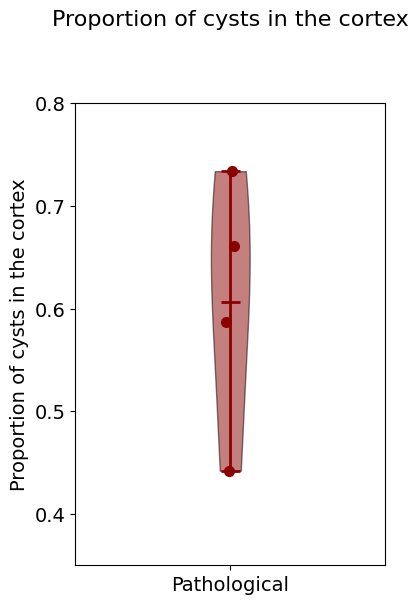

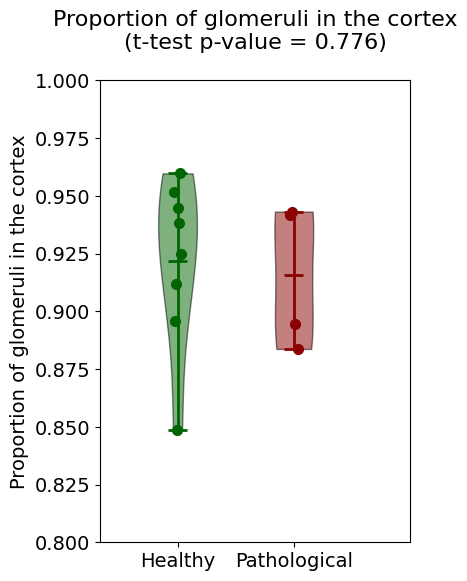

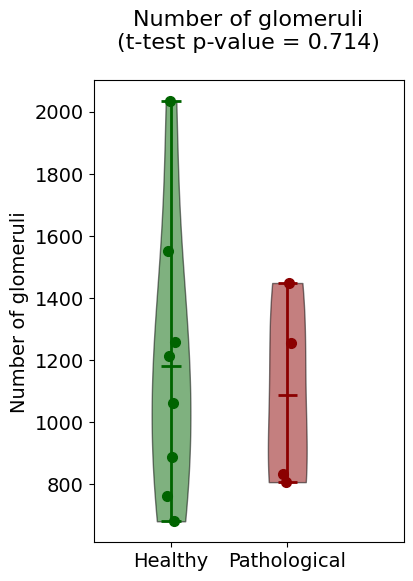

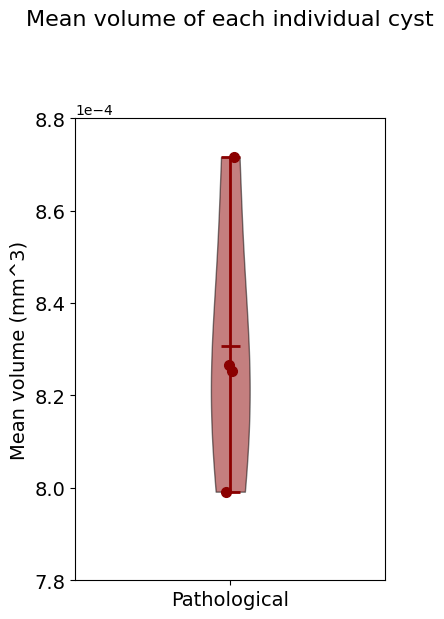

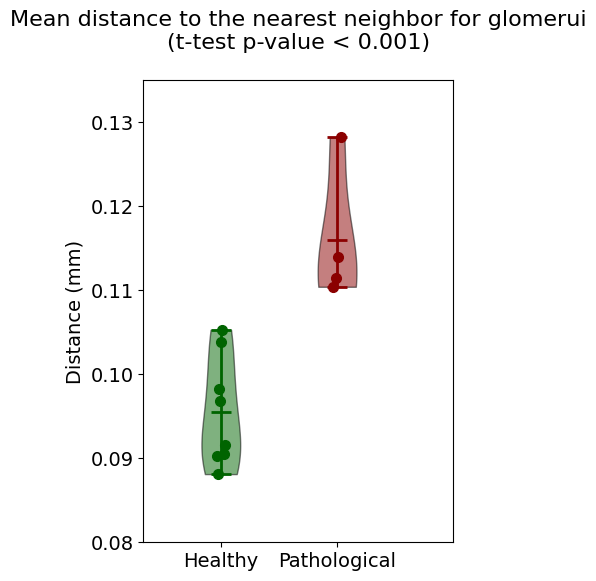

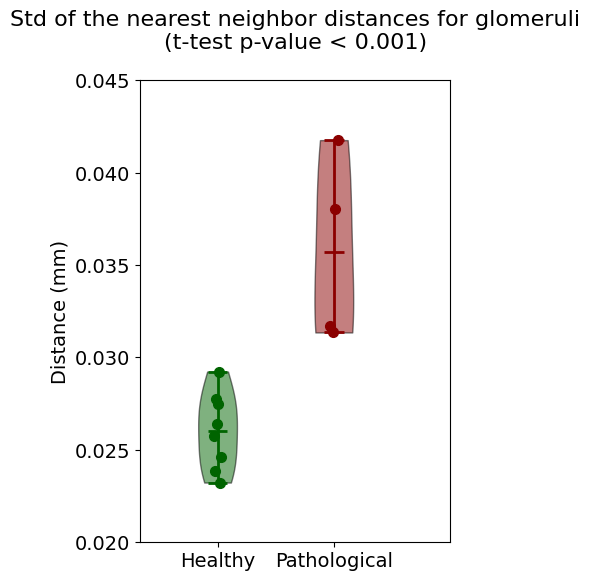

In [ ]:
#Notebook to extract the final data from the masks and txt files

from obtainData.obtainData import *

saveFigures = True
figFolder = 'E:\Thesis\Figures'

#Dictionary with the paths to the healthy kidneys, including their folder (MacroSPIM1, 2...)
healthyPaths = ['MacroSPIM1/Kidney1_derecho_4.8x_1x3_R_Lshifted1.6mm_0.5_Lectine_pygorpho_strRad_20',\
           'MacroSPIM1/Kidney1_izq_4.8x_1x3_R_Lshifted1.6mm_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R1CLeft2021_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R1CRight2021_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R1Left_samplesNov2020_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R1Right_samplesNov2020_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R2Left_samplesNov2020_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R2Right_samplesNov2020_0.5_Lectine_pygorpho_strRad_20']

#Dictionary with the paths to the pathological kidneys
pathologicalPaths = ['MacroSPIM2/KidneyR2Left_LectinRed_LRSamples2021_0.5_Lectine_pygorpho_strRad_20',\
                    'MacroSPIM2/KidneyR2Right_LectinRed_RLSamples2021_0.5_Lectine_pygorpho_strRad_20',\
                    'MacroSPIM3/R2LEC-Path_0.5_Lectine_pygorpho_strRad_20',\
                    'MacroSPIM3/R6LEC-Path_0.5_Lectine_pygorpho_strRad_20']


#Length of each voxel (1.354 micrometers is the original length of the voxel, they are roughly isotropic). The images
#have been downsampled by a factor of 2, so the length of the voxel is 1.354 * 2 = 2.708 micrometers.
voxSize = 2.708

#Size in micrometers**3 of the volume of a voxel (pixelLength**3) 
#voxSizeVol = 19.659

#--------------------------------------------------------------
#Kidney volumes

#Main path where the values are stored
mainPathKidneys = 'D:/0 - Thesis Data/Corrected kidney segmentations'

#Function to measure the kidney volumes 
healthyKidneyVolumes,pathologicalKidneyVolumes =  readDataFromTxt(mainPathKidneys,'kidney','both',\
                                                                    healthyPaths, pathologicalPaths)


#Plot the kidney volumes

meanHealthyKidneyVolumes,stdHealthyKidneyVolumes,meanPathoKidneyVolumes,stdPathoKidneyVolumes=plotBarsAndPoints(\
    titleTag = 'Kindey volumes',\
    ylabelTag = 'Kidney volume (mm^3)',\
    healthyDataVoxels = healthyKidneyVolumes,\
    pathologicalDataVoxels = pathologicalKidneyVolumes,\
    dataset = 'both',\
    voxelSize = voxSize,\
    ttest = True,\
    saving = saveFigures,\
    figuresFolder = figFolder,\
    yLims = [60,200])

print('Mean healthy kidney volume: ',meanHealthyKidneyVolumes)
print('Std healthy kidney volume: ',stdHealthyKidneyVolumes)
print('Mean pathological kidney volume: ',meanPathoKidneyVolumes)
print('Std healthy kidney volume: ',stdHealthyKidneyVolumes)
print('\n\n')


#Function to measure the kidney inertia tensor eigenvalues
healthyKidneyTensorEigVals,pathologicalKidneyTensorEigVals =  readDataFromTxt(mainPathKidneys,'kidneyTensorEigVals','both',\
                                                                    healthyPaths, pathologicalPaths)

#And calculate the principal axes lengths
healthyPrincipalAxesLengths = np.array([np.sqrt(healthyKidneyTensorEigVals[:,0]),np.sqrt(healthyKidneyTensorEigVals[:,1]),\
                            np.sqrt(healthyKidneyTensorEigVals[:,2])])

pathologicalPrincipalAxesLengths = np.array([np.sqrt(pathologicalKidneyTensorEigVals[:,0]),np.sqrt(pathologicalKidneyTensorEigVals[:,1]),\
                            np.sqrt(pathologicalKidneyTensorEigVals[:,2])])


print('Healthy principal axes lengths: ',healthyPrincipalAxesLengths)
print('Pathological principal axes lengths: ',pathologicalPrincipalAxesLengths) 



mainPathInner  = 'D:/0 - Thesis Data/Kidney interior segmentations'

#Function to measure the inner volumes 
healthyInnerVolumes,pathologicalInnerVolumes =  readDataFromTxt(mainPathInner,'innerRegion','both',\
                                                                    healthyPaths, pathologicalPaths)

#Transform them to cortex volumes by subtracting them from the full kidney volumes

healthyCortexVolumes = healthyKidneyVolumes - healthyInnerVolumes
pathologicalCortexVolumes = pathologicalKidneyVolumes - pathologicalInnerVolumes

#Plot the cortex volumes

meanHealthyCortexVolumes,stdHealthyCortexVolumes,meanPathoCortexVolumes,stdPathoCortexVolumes=plotBarsAndPoints(\
    titleTag = 'Cortex volumes',\
    ylabelTag = 'Cortex volume (mm^3)',\
    healthyDataVoxels = healthyCortexVolumes,\
    pathologicalDataVoxels = pathologicalCortexVolumes,\
    dataset = 'both',\
    voxelSize = voxSize,\
    ttest = True,\
    saving = saveFigures,\
    figuresFolder = figFolder,\
    yLims = [45,140])

print('Mean healthy cortex volume: ',meanHealthyCortexVolumes)
print('Std healthy cortex volume: ',stdHealthyCortexVolumes)
print('Mean pathological cortex volume: ',meanPathoCortexVolumes)
print('Std pathological cortex volume: ',stdPathoCortexVolumes)
print('\n\n')

#--------------------------------------------------------------
#Cavity volumes

#Main path where the values are stored
mainPathCavities = 'E:\Github repositories\LSFM-processing-data\Full kidney and vessels segmentation'

#Function to measure the kidney volumes 
healthyCavityVolumes,pathologicalCavityVolumes =  readDataFromTxt(mainPathCavities, 'vessels', 'both',\
                                                                     healthyPaths, pathologicalPaths)


#Compute ratios of cavity volume to kidney volume
healthyCavityProps = healthyCavityVolumes/healthyKidneyVolumes
pathologicalCavityProps = pathologicalCavityVolumes/pathologicalKidneyVolumes

#Plot the results of these ratios
meanHealthyCavityProps,stdHealthyCavityProps,meanPathoCavityProps,stdPathoCavityProps = plotBarsAndPoints(\
    titleTag = 'Cavity volume proportions',\
    ylabelTag = 'Cavity volume proportions',\
    healthyDataVoxels = healthyCavityProps,\
    pathologicalDataVoxels = pathologicalCavityProps,\
    dataset = 'both',\
    voxelSize = voxSize,\
    ttest = True,\
    saving = saveFigures,\
    figuresFolder = figFolder)
                
print('Mean healthy cavity proportion: ',meanHealthyCavityProps)
print('Std healthy cavity proportion: ',stdHealthyCavityProps)
print('Mean pathological cavity proportion: ',meanPathoCavityProps)
print('Std pathological cavity proportion: ',stdPathoCavityProps)
print('\n\n')

#-----------------------------------------------------------------------------------------
#Proportion of cysts in the cortex over the total number of cysts on pathological kidneys

#Main path where the values are stored
mainPathPropCysts = 'D:/0 - Thesis Data/Kidney interior segmentations'

#Function to measure the number of cysts. The function returns the total number of cysts
#(first column) and the number of cysts in the inner region (second column)
cystNumsInner = readDataFromTxt(mainPathPropCysts,'cystsInnerRegion','one',healthyPaths, pathologicalPaths)

#Proportion of cysts in the cortex
cystPropsCortex = 1-(cystNumsInner[:,1]/cystNumsInner[:,0])

meanCystPropsCortex,stdCystPropsCortex = plotBarsAndPoints('Proportion of cysts in cortex',\
                'Proportion of cysts in the cortex',\
                cystPropsCortex,\
                dataset = 'pathological',\
                saving = saveFigures,\
                figuresFolder = figFolder,\
                yLims = [0.35,0.8])

print('Mean cyst proportion in the cortex: ',meanCystPropsCortex)
print('Std cyst proportion in the cortex: ',stdCystPropsCortex)
print('\n\n')

#-----------------------------------------------------------------------------------------
#Proportion of glomeruli in the cortex over the total number of cysts 

#Main path where the values are stored
mainPathPropCysts = 'D:/0 - Thesis Data/Kidney interior segmentations'

#Function to measure the proportions 
glomNumsInnerHealhty, glomNumsInnerPathological = readDataFromTxt(mainPathPropCysts,'glomeruliInnerRegion','both',healthyPaths, pathologicalPaths)

glomPropsCortexHealhty = 1-glomNumsInnerHealhty[:,1]/glomNumsInnerHealhty[:,0]
glomPropsCortexPathological = 1-glomNumsInnerPathological[:,1]/glomNumsInnerPathological[:,0]

meanGlomPropsCortexHealhty,stdGlomPropsCortexHealhty,meanGlomPropsCortexPatho,stdGlomPropsCortexPatho = plotBarsAndPoints(\
    'Proportion of glomeruli in cortex',\
    'Proportion of glomeruli in the cortex',\
    glomPropsCortexHealhty,\
    glomPropsCortexPathological,\
    dataset = 'both',\
    ttest = True,\
    saving = saveFigures,\
    figuresFolder = figFolder,\
    yLims = [0.8,1])

print('Mean glomeruli proportion in the cortex healthy: ',meanGlomPropsCortexHealhty)
print('Std glomeruli proportion in the cortex healthy: ',stdGlomPropsCortexHealhty)
print('Mean glomeruli proportion in the cortex pathological: ',meanGlomPropsCortexPatho)
print('Std glomeruli proportion in the cortex pathological: ',stdGlomPropsCortexPatho)
print('\n\n')


meanNumGlomHealthy,stdNumGlomHealthy,meanNumGlomPatho,stdNumGlomPatho = plotBarsAndPoints(\
    'Number of glomeruli',\
    'Number of glomeruli',\
    glomNumsInnerHealhty[:,1],\
    glomNumsInnerPathological[:,1],\
    dataset = 'both',\
    ttest = True,\
    saving = saveFigures,\
    figuresFolder = figFolder)

print('Mean number of glomeruli healthy: ',meanNumGlomHealthy)
print('Std number of glomeruli healthy: ',stdNumGlomHealthy)
print('Mean number of glomeruli pathological: ',meanNumGlomPatho)
print('Std number of glomeruli pathological: ',stdNumGlomPatho)
print('\n\n')

#-------------------------------------------------
#Mean volume of individual cysts

from obtainData.obtainData import *


mainPathCysts = 'D:/0 - Thesis Data/Cysts segmentations'
healthyMeanCystAreas, PathoMeanCystAreas = measuresFromConCompsTxt(mainPathCysts,typeAnalysis = 'meanVolumes',\
                        typeData = 'cysts',\
                        healthyPaths=healthyPaths,\
                        pathologicalPaths=pathologicalPaths)
                    

meanMeanCystAreas,stdMeanCystAreas = plotBarsAndPoints('Mean volume of each cyst',\
                'Mean volume (mm^3)',\
                PathoMeanCystAreas[:,1],\
                dataset = 'pathological',\
                voxelSize = voxSize,\
                ttest = False,\
                saving = saveFigures,\
                figuresFolder = figFolder,\
                scientNot = True,\
                yLims = [7.8e-04,8.8e-04])

print('Mean mean cyst volume pathological: ',meanMeanCystAreas)
print('Std mean cyst volume pathological: ',stdMeanCystAreas)
print('\n\n')

#----------------------------------------------------
#Mean distance to the nearest neighbor for each glomerulus

mainPathGlomeruli = 'D:/0 - Thesis Data/Glomeruli segmentations txts'
healthyMeanGlomNN, PathoMeanGlomNN = measuresFromConCompsTxt(mainPathGlomeruli,typeAnalysis = 'meanNearestNeighbors',\
                        typeData = 'glomeruli',\
                        healthyPaths=healthyPaths,\
                        pathologicalPaths=pathologicalPaths)

#Means of the NN distances
meanHealthyMeanGlomNN, stdHealthyMeanGlomNN,meanPathoMeanGlomNN,stdPathoMeanGlomNN  = plotBarsAndPoints(\
    'Mean of nn distances for glomerui',\
    'Distance (mm)',\
    healthyMeanGlomNN[:,1],\
    PathoMeanGlomNN[:,1],\
    dataset = 'both',\
    voxelSize = voxSize,\
    ttest = True,\
    saving = saveFigures,\
    figuresFolder = figFolder,
    dataDim = 1,\
    yLims = [0.08,0.135])    

print('Mean mean distance to the nearest neighbor healthy: ',meanHealthyMeanGlomNN)
print('Std mean distance to the nearest neighbor healthy: ',stdHealthyMeanGlomNN)
print('Mean mean distance to the nearest neighbor pathological: ',meanPathoMeanGlomNN)
print('Std mean distance to the nearest neighbor pathological: ',stdPathoMeanGlomNN)
print('\n\n')

#Stds of the NN distances

meanHealthyStdGlomNN, stdHealthyStdGlomNN,meanPathoStdGlomNN,stdPathoStdGlomNN  = plotBarsAndPoints(\
    'Std of nn distances for glomeruli',\
    'Distance (mm)',\
    healthyMeanGlomNN[:,2],\
    PathoMeanGlomNN[:,2],\
    dataset = 'both',\
    voxelSize = voxSize,\
    ttest = True,\
    saving = saveFigures,\
    figuresFolder = figFolder,
    dataDim = 1,\
    yLims = [0.02,0.045])    

print('Mean of the std of the distances to the nearest neighbor healthy: ',meanHealthyStdGlomNN)
print('Std of the std of the distances to the nearest neighbor healthy: ',stdHealthyStdGlomNN)
print('Mean of the std of the distances to the nearest neighbor pathological: ',meanPathoStdGlomNN)
print('Std of the std of the distances to the nearest neighbor pathological: ',stdPathoStdGlomNN)
print('\n\n')


e:\Github repositories\LSFM-processing\obtainData\obtainData.py:449: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


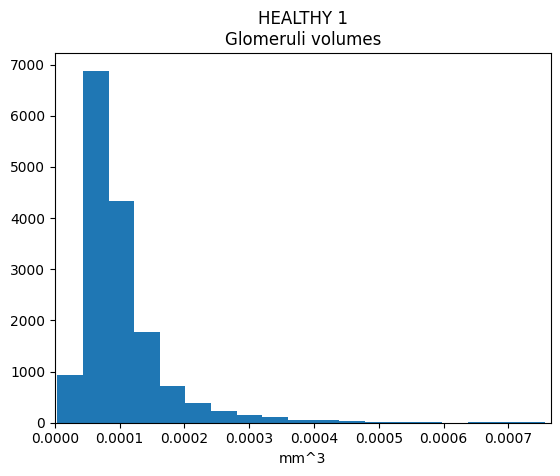

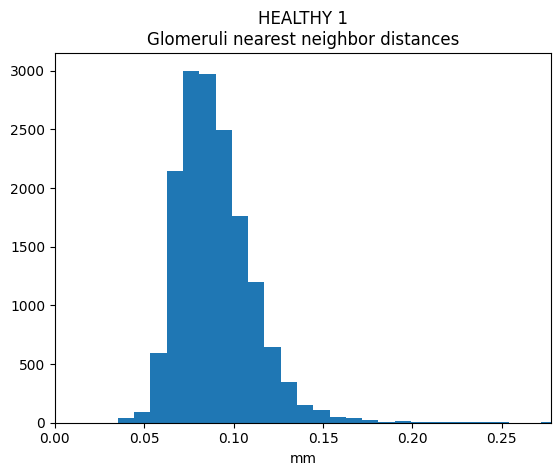

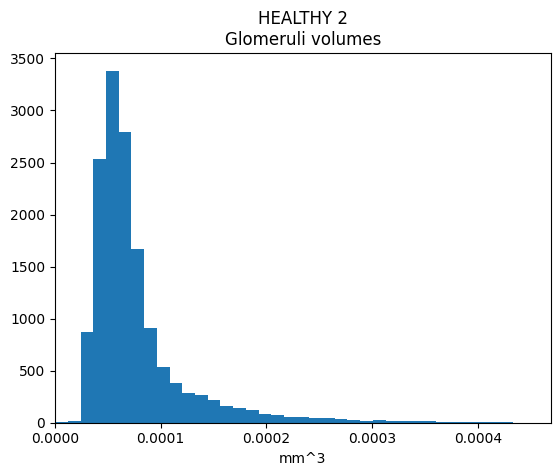

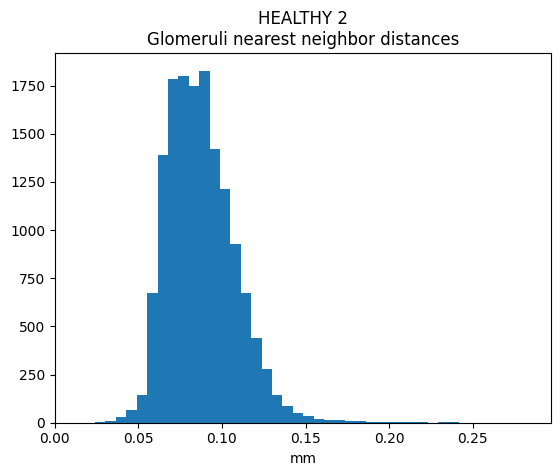

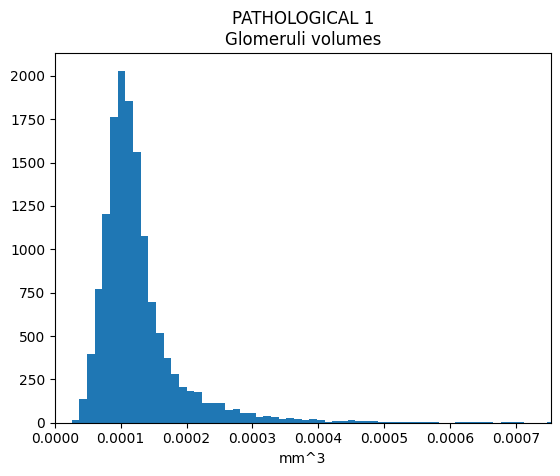

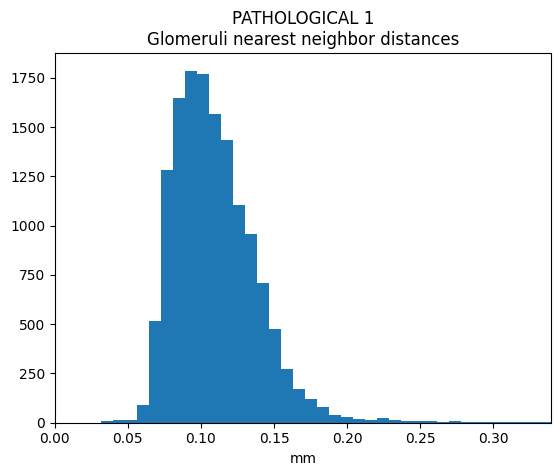

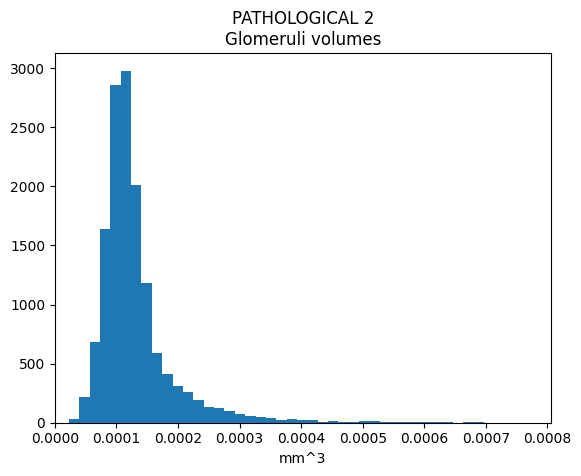

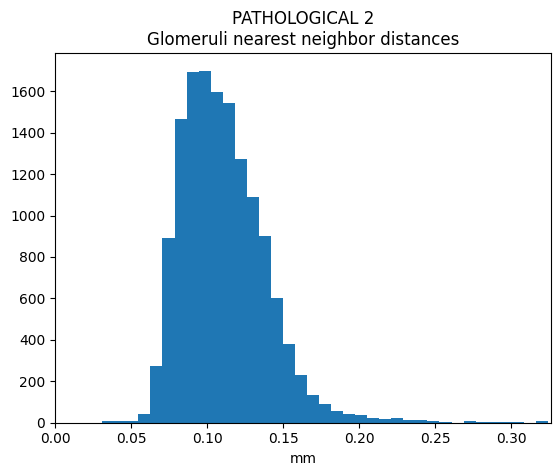

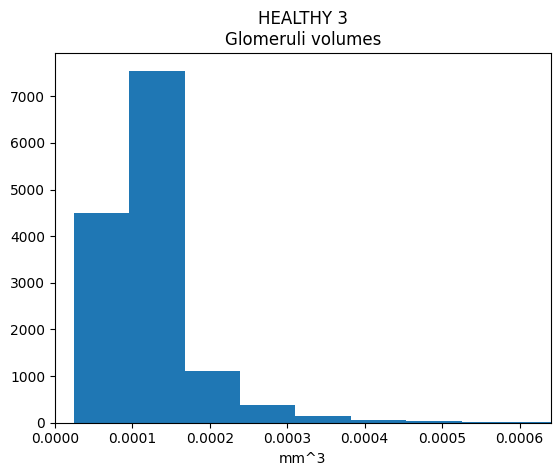

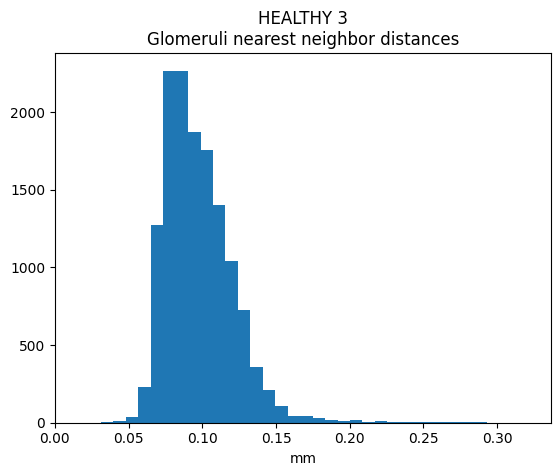

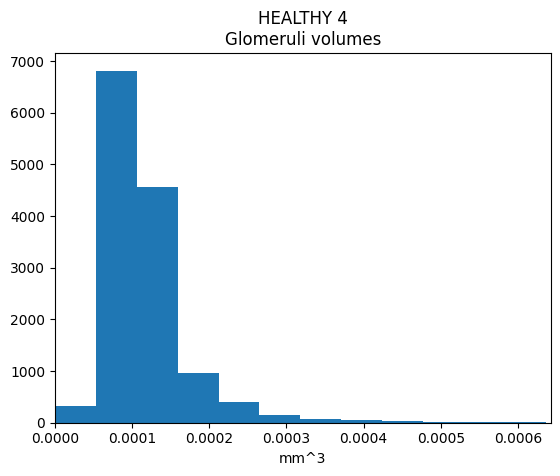

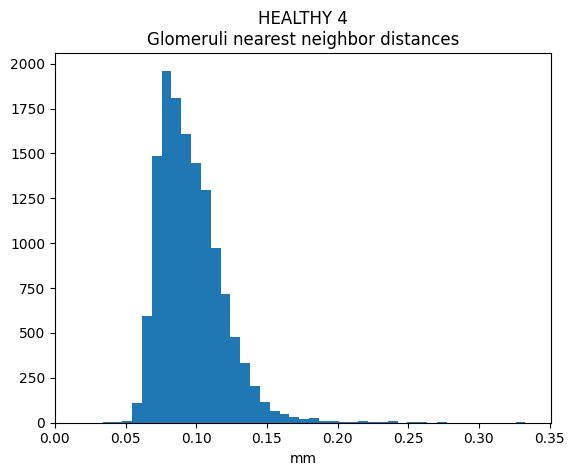

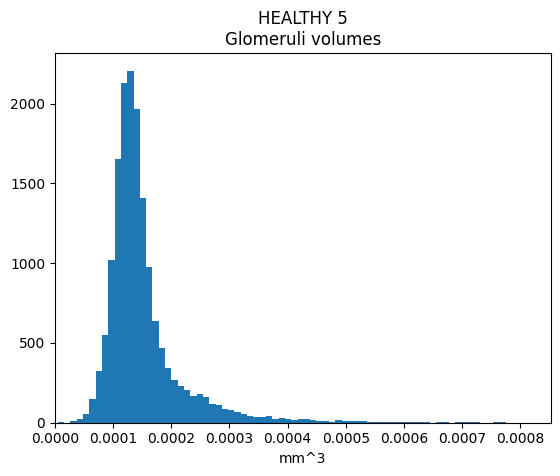

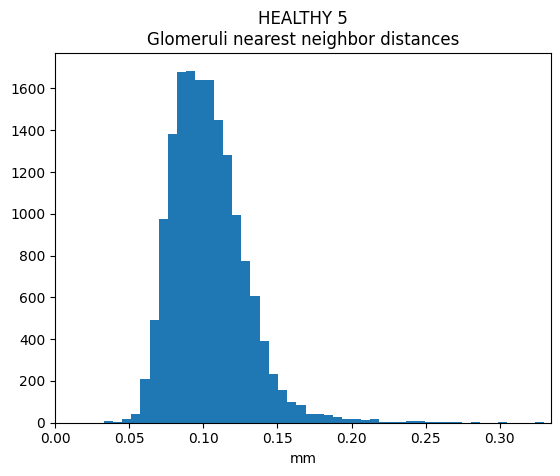

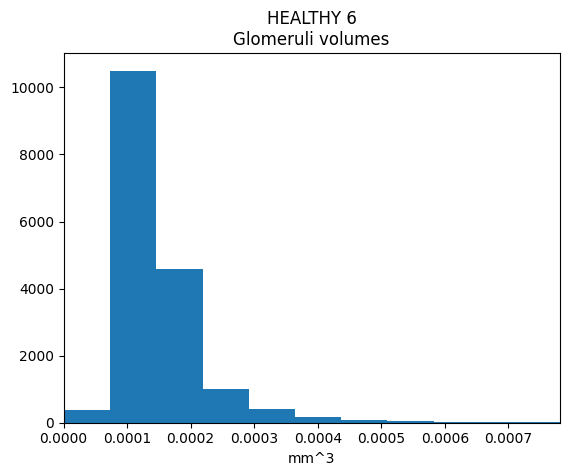

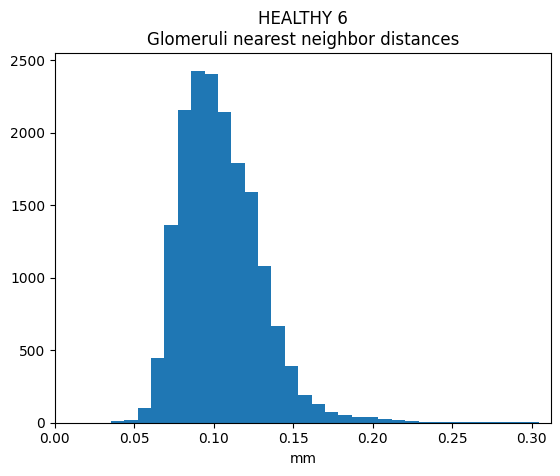

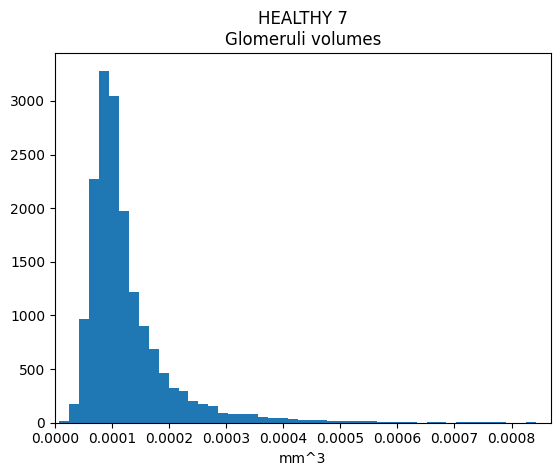

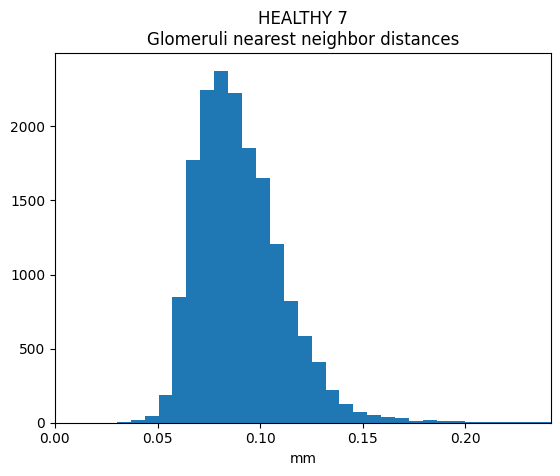

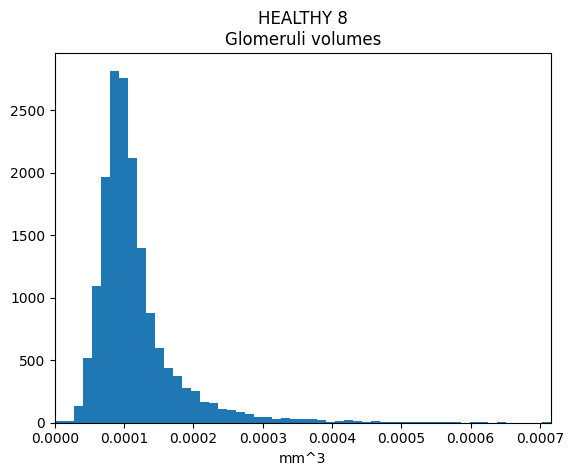

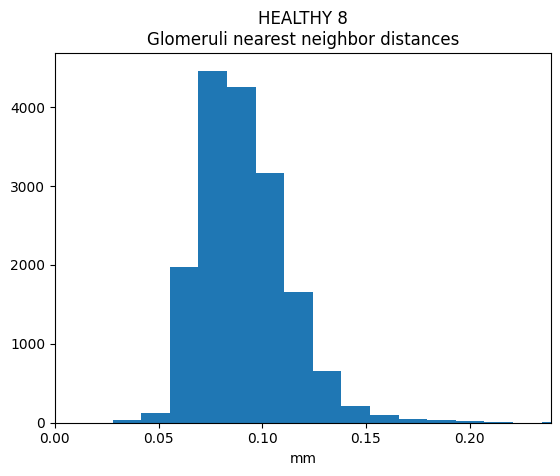

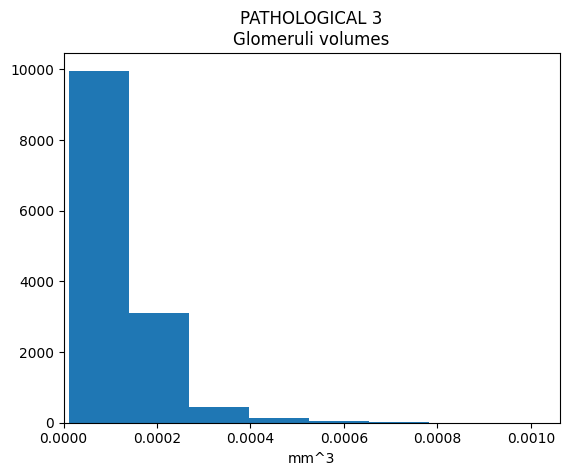

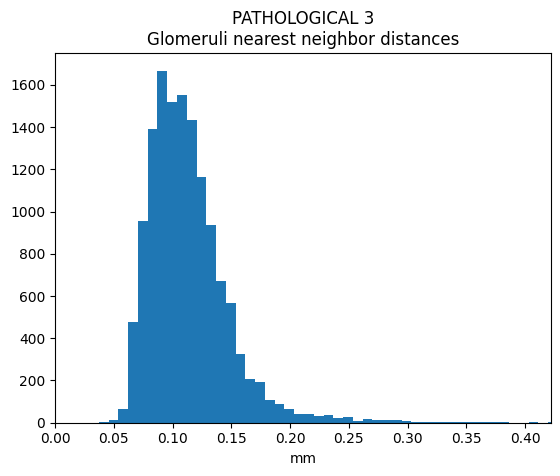

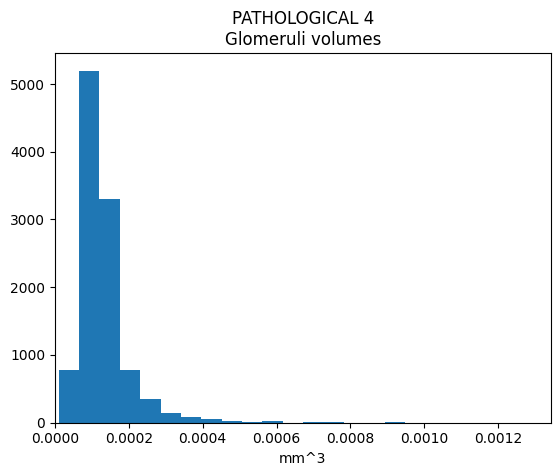

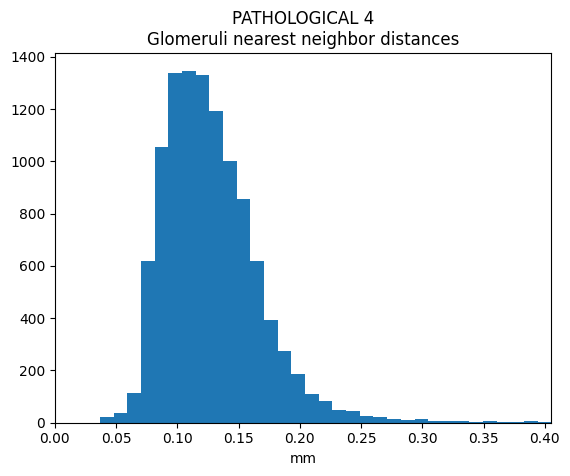

In [1]:
#Notebook to extract the final data from the masks and txt files

from obtainData.obtainData import *

saveFigures = True
figFolder = 'E:\Thesis\Figures\In-depth 3D Exploration of the Polycystic Mouse Kidney Through Light Sheet Fluorescence Microscopy\Histograms'

#Dictionary with the paths to the healthy kidneys, including their folder (MacroSPIM1, 2...)
healthyPaths = ['MacroSPIM1/Kidney1_derecho_4.8x_1x3_R_Lshifted1.6mm_0.5_Lectine_pygorpho_strRad_20',\
           'MacroSPIM1/Kidney1_izq_4.8x_1x3_R_Lshifted1.6mm_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R1CLeft2021_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R1CRight2021_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R1Left_samplesNov2020_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R1Right_samplesNov2020_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R2Left_samplesNov2020_0.5_Lectine_pygorpho_strRad_20',\
            'MacroSPIM2/R2Right_samplesNov2020_0.5_Lectine_pygorpho_strRad_20']

#Dictionary with the paths to the pathological kidneys
pathologicalPaths = ['MacroSPIM2/KidneyR2Left_LectinRed_LRSamples2021_0.5_Lectine_pygorpho_strRad_20',\
                    'MacroSPIM2/KidneyR2Right_LectinRed_RLSamples2021_0.5_Lectine_pygorpho_strRad_20',\
                    'MacroSPIM3/R2LEC-Path_0.5_Lectine_pygorpho_strRad_20',\
                    'MacroSPIM3/R6LEC-Path_0.5_Lectine_pygorpho_strRad_20']


#Length of each voxel (1.354 micrometers is the original length of the voxel, they are roughly isotropic). The images
#have been downsampled by a factor of 2, so the length of the voxel is 1.354 = 2.708 micrometers.
voxSize = 2.708

#Size in micrometers**3 of the volume of a voxel (pixelLength**3) 
#voxSizeVol = 19.659


mainPathGlomeruli = 'D:/0 - Thesis Data/Glomeruli segmentations txts'

measuresFromConCompsTxt(mainPathGlomeruli,typeAnalysis = 'showDistributions',\
                        typeData = 'glomeruli',\
                        healthyPaths=healthyPaths,\
                        pathologicalPaths=pathologicalPaths,\
                        percentile = 99.9,figuresFolder = figFolder,\
                        saveDistr=True, voxelSize = voxSize)
